### Выполнил: Салтыков Вадим Евгеньевич
### Группа: 18-ИВТ-3
### Вариант №33

####  Задание:
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

#### Набор данных: poker (11)

#### Классификаторы:
##### 1) Классификатор K ближайших соседей (задаётся количество ближайших объектов)
##### 3) Линейный классификатор (персептрон)

##### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

1. S1 масть карты # 1 (Порядковый номер (1-4), представляет {Червы, Пики, Бубны, Трефы})
2. C1 старшинство карты # 1 (Числа (1-13), представляет (Туз, 2, 3, ..., Королева, Король))
3. S2 масть карты # 2 (Порядковый номер (1-4), представляет {Червы, Пики, Бубны, Трефы})
4. C2 старшинство карты # 2 (Числа (1-13), представляет (Туз, 2, 3, ..., Королева, Король))
5. S3 масть карты # 3 (Порядковый номер (1-4), представляет {Червы, Пики, Бубны, Трефы})
6. C3 старшинство карты # 3 (Числа (1-13), представляет (Туз, 2, 3, ..., Королева, Король))
7. S4 масть карты # 4 (Порядковый номер (1-4), представляет {Червы, Пики, Бубны, Трефы})
8. C4 старшинство карты # 4 (Числа (1-13), представляет (Туз, 2, 3, ..., Королева, Король))
9. S5 масть карты # 5 (Порядковый номер (1-4), представляет {Червы, Пики, Бубны, Трефы})
10. C5 старшинство карты # 5 (Числа (1-13), представляет (Туз, 2, 3, ..., Королева, Король))
11. CLASS Порядковый номер (0-9)
    -  0: Ничего в руке; нет покерной комбинации
    -  1: Одна пара; одна пара равных рангов в пяти картах
    -  2: Две пары; две пары равных рангов в пяти картах
    -  3: Тройка; три равных ранга в пяти картах
    -  4: Стрит; пять карт, последовательно ранжированных без пропусков
    -  5: Флеш; пять карт одной масти
    -  6: Фулл хаус; пара + другой ранг три в своем роде
    -  7: Карэ; четыре равных ранга в пяти картах
    -  8: Стрит-флеш; Стрит + Флеш
    -  9: Роял флеш; {Туз, Король, Королева, Валет, 10} + флеш

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
%pylab inline
from pylab import rcParams
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
df_poker = pd.read_csv("poker-hand-training-true.data.txt", header = None)
df_poker.columns = ['Suit of card #1', 'Rank of card #1', 'Suit of card #2', 'Rank of card #2', 'Suit of card #3', 'Rank of card #3',
                   'Suit of card #4', 'Rank of card #4',  'Suit of card #5',  'Rank of card #5', 
                   'Poker Hand']
df_poker

,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card #5,Poker Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9
...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,0
25006,4,1,4,10,3,13,3,4,1,10,1
25007,2,1,2,10,4,4,4,1,4,13,1
25008,2,12,4,3,1,10,1,12,4,9,1


##### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [5]:
print("Размер набора данных до удаления дубликатов:\t", df_poker.index.size)
df_poker.drop_duplicates(keep = 'first', inplace = True)
print("Размер набора данных после удаления дубликатов:\t", df_poker.index.size)

Размер набора данных до удаления дубликатов:	 25010
Размер набора данных после удаления дубликатов:	 25008


##### 3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

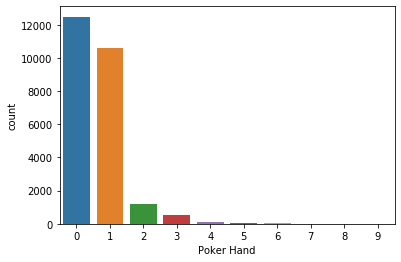

In [6]:
sns.countplot(data=df_poker, x='Poker Hand')
plt.show()

##### 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

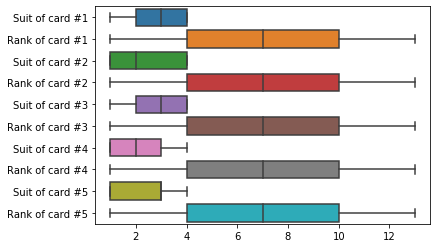

In [7]:
df_numerical = df_poker.drop('Poker Hand', axis = 1)
sns.boxplot(data = df_numerical, orient = 'h')

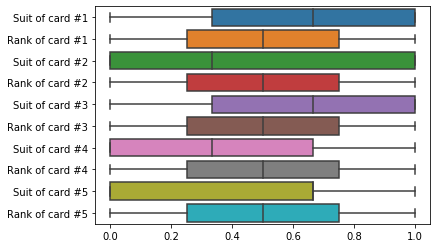

In [9]:
scaler = MinMaxScaler()
columns = df_numerical.columns
df_numerical[columns] = scaler.fit_transform(df_numerical[columns])
sns.boxplot(data = df_numerical, orient = 'h')

##### 5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [10]:
df_poker = pd.get_dummies(df_poker, columns = ['Poker Hand'])
df_poker.head()

,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card #5,Poker Hand_0,Poker Hand_1,Poker Hand_2,Poker Hand_3,Poker Hand_4,Poker Hand_5,Poker Hand_6,Poker Hand_7,Poker Hand_8,Poker Hand_9
0,1,10,1,11,1,13,1,12,1,1,0,0,0,0,0,0,0,0,0,1
1,2,11,2,13,2,10,2,12,2,1,0,0,0,0,0,0,0,0,0,1
2,3,12,3,11,3,13,3,10,3,1,0,0,0,0,0,0,0,0,0,1
3,4,10,4,11,4,1,4,13,4,12,0,0,0,0,0,0,0,0,0,1
4,4,1,4,13,4,12,4,11,4,10,0,0,0,0,0,0,0,0,0,1


##### 6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации)

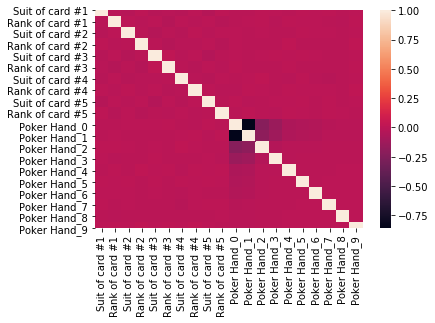

In [11]:
corr = df_poker.corr()
sns.heatmap(corr)

##### 7. Заполните пропущенные значения в данных

In [12]:
df_poker.count()

Suit of card #1    25008
Rank of card #1    25008
Suit of card #2    25008
Rank of card #2    25008
Suit of card #3    25008
Rank of card #3    25008
Suit of card #4    25008
Rank of card #4    25008
Suit of card #5    25008
Rank of card #5    25008
Poker Hand_0       25008
Poker Hand_1       25008
Poker Hand_2       25008
Poker Hand_3       25008
Poker Hand_4       25008
Poker Hand_5       25008
Poker Hand_6       25008
Poker Hand_7       25008
Poker Hand_8       25008
Poker Hand_9       25008
dtype: int64

Пропущенных значений нет

##### 8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию.

#### Классификаторы:
##### 1) Классификатор K ближайших соседей (задаётся количество ближайших объектов)
##### 3) Линейный классификатор (персептрон)

In [17]:
x = df_numerical
y = df_poker['Poker Hand_0']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [18]:
knn = KNeighborsClassifier()

search = GridSearchCV(knn, {'n_neighbors': [x for x in range(1, 50)]})
search.fit(x_train, y_train)

n = search.best_estimator_.n_neighbors
best = search.best_score_

knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)
print("accuracy:", accuracy_score(y_test, knn_predict))
print('best:', best)

accuracy: 0.6293482606957217
best: 0.6355592011542341


In [19]:
ppn = Perceptron()
parameters_pnn = {'alpha': np.linspace(1, 5, 25), 'max_iter': [x for x in range(1, 40)]}
grid_ppn = GridSearchCV(ppn, parameters_pnn) 
grid_ppn = grid_ppn.fit(x_train, y_train)
alpha = grid_ppn.best_estimator_.alpha
max_iter = grid_ppn.best_estimator_.max_iter

ppn = Perceptron(alpha = alpha, max_iter = max_iter)
ppn.fit(x_train, y_train)
y_score = ppn.predict(x_test)

print("accuracy:", accuracy_score(y_test, y_score))
print("best:", grid_ppn.best_score_)

accuracy: 0.4948020791683327
best: 0.506846651655427


##### PR-кривая

In [20]:
prob_ppn = CalibratedClassifierCV(ppn).fit(x_train, y_train).predict_proba(x_test)
prob_knn = knn.predict_proba(x_test)

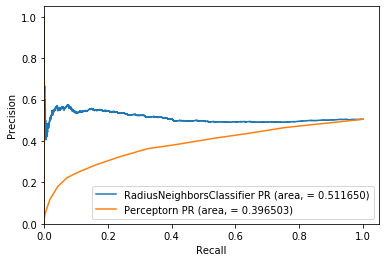

In [21]:
def addPR(prob, occupancy, name, test):
    precision, recall, _ = precision_recall_curve(test, prob[:, occupancy])
    aps = average_precision_score(test, prob[:, occupancy])
    plt.plot(recall, precision, label='%s PR (area, = %f)' % (name, aps))

def addROC(prob, occupancy, name, test):
    tpr, fpr, thresholds = roc_curve(test, prob[:, occupancy])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC curve (area, = %f)' % (name, roc_auc))

addPR(prob_ppn, 0, 'RadiusNeighborsClassifier', y_test)
addPR(prob_knn, 0, 'Perceptorn', y_test)

plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 4, fontsize = 'medium')
plt.show()

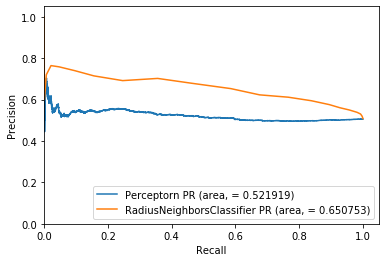

In [22]:
addPR(prob_ppn, 1, 'Perceptorn', y_test)
addPR(prob_knn, 1, 'RadiusNeighborsClassifier', y_test)

plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 4, fontsize = 'medium')
plt.show()

##### ROC-кривая

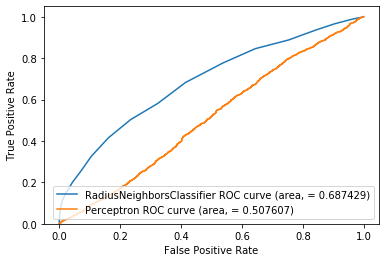

In [23]:
addROC(prob_knn, 0, 'RadiusNeighborsClassifier', y_test)
addROC(prob_ppn, 0, 'Perceptron', y_test)

plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 4, fontsize = 'medium')
plt.show()

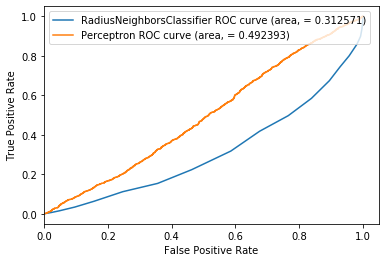

In [24]:
addROC(prob_knn, 1, 'RadiusNeighborsClassifier', y_test)
addROC(prob_ppn, 1, 'Perceptron', y_test)

plt.xlim([0, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 2, fontsize = 'medium')
plt.show()

##### 9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Оба классификатора (персептрон и k ближайших соседей) имеют примерно одинаковые показатели качества относительно PR и ROC кривых.